In [2]:
!pip install pyngrok
!pip install dash
!pip install dash-bootstrap-components
!pip install dash-bootstrap-templates


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.2/97.2 kB 1.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.stats import chi2_contingency
from IPython.display import Markdown, display
from dash import Dash, dcc, html, dash_table, Input, Output
import plotly.express as px
import plotly.graph_objects as go
from pyngrok import ngrok

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/projets_personnels/marketing_campaign.csv', sep=';')

In [6]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [10]:
print(df.duplicated().sum())

0


In [11]:
df = df.dropna(subset=['Income'])
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


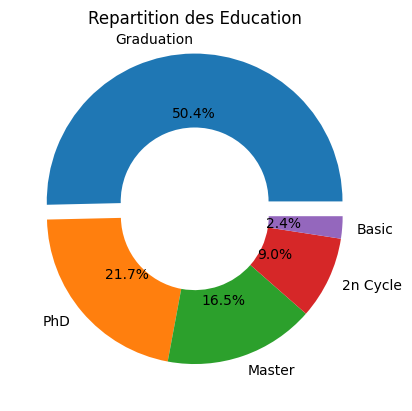

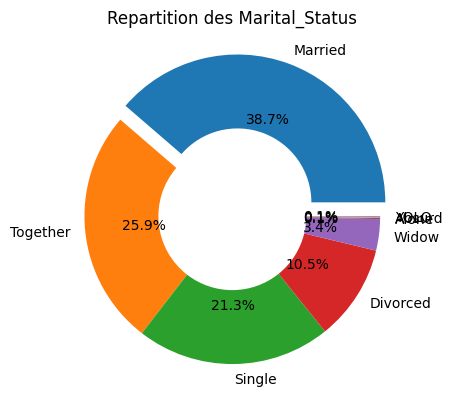

In [18]:
col_cat = df.select_dtypes(include='object').columns
for col in col_cat:
  counts_values = df[col].value_counts()
  label = counts_values.index
  value = counts_values.values
  explode = [0.1 if i == np.argmax(value) else 0 for i in range(len(value))]
  plt.pie(df[col].value_counts(),
          labels=label, autopct='%1.1f%%',
          wedgeprops=dict(width=0.5),
          explode=explode)
  plt.title(f'Repartition des {col}')
  plt.show()

In [19]:
for col in col_cat:
  print(f"Repartition de la colonne {col}")
  print(df[col].value_counts())

Repartition de la colonne Education
Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64
Repartition de la colonne Marital_Status
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


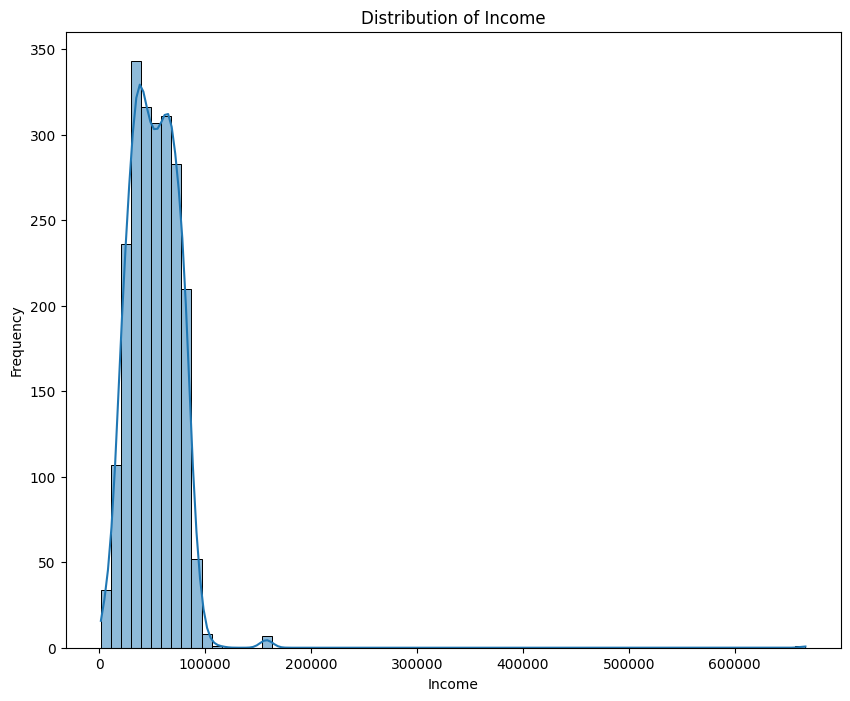

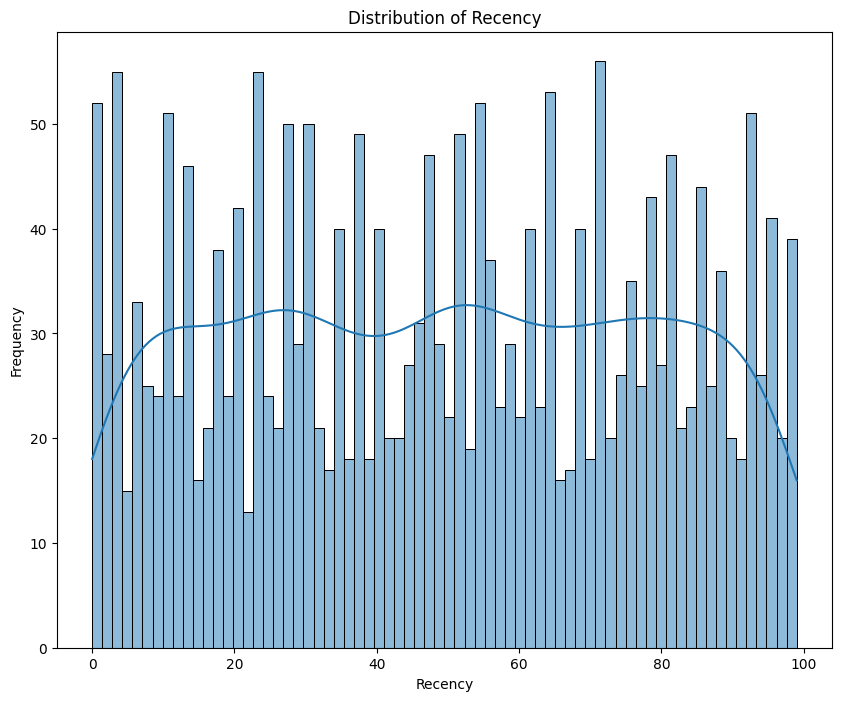

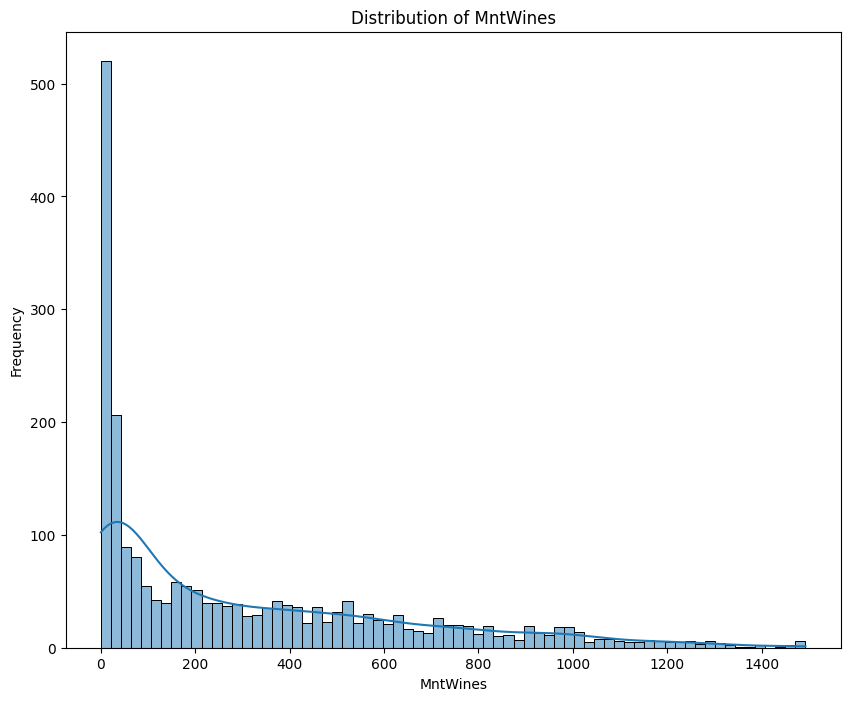

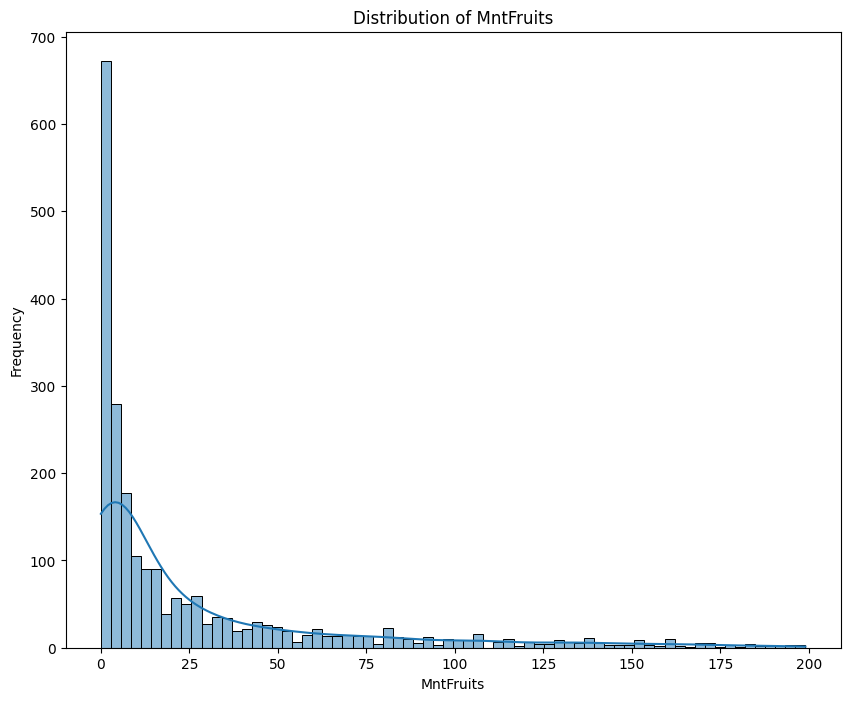

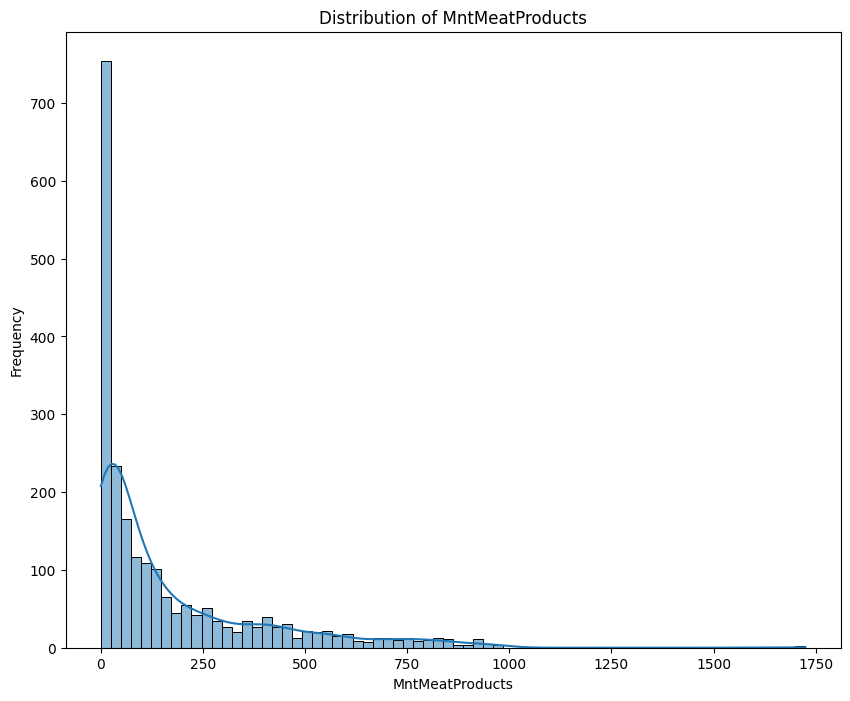

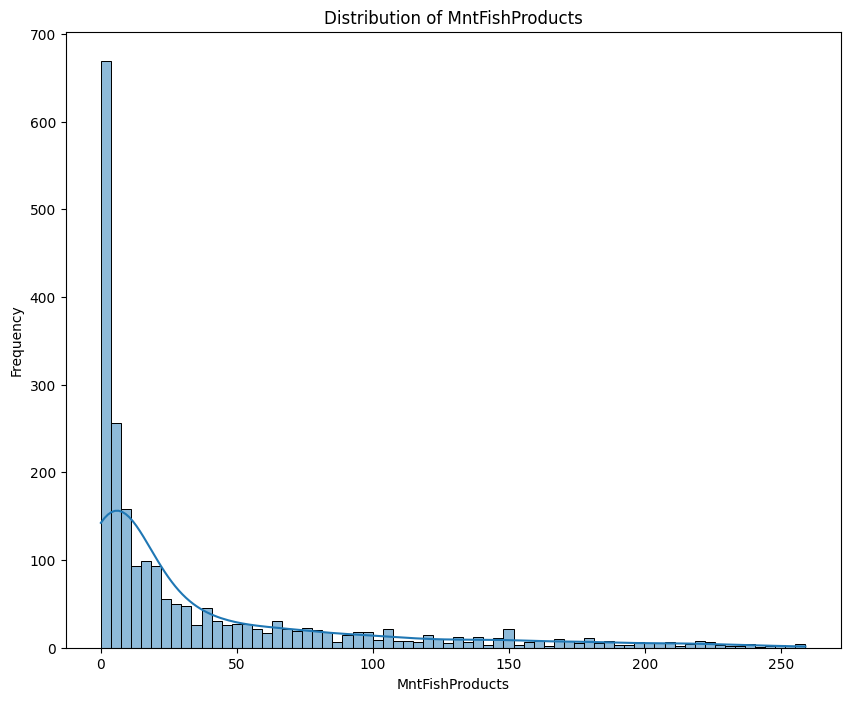

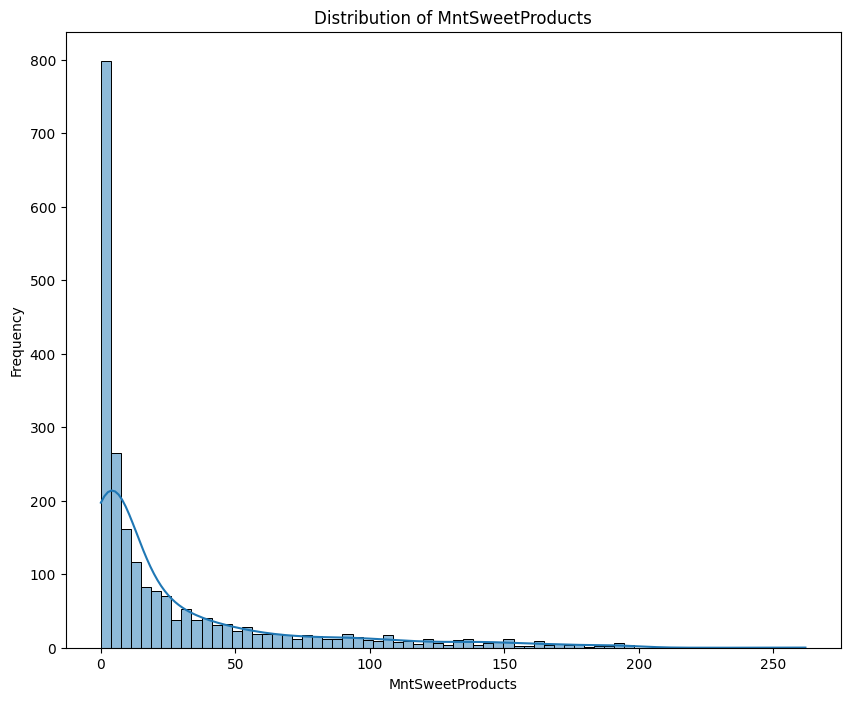

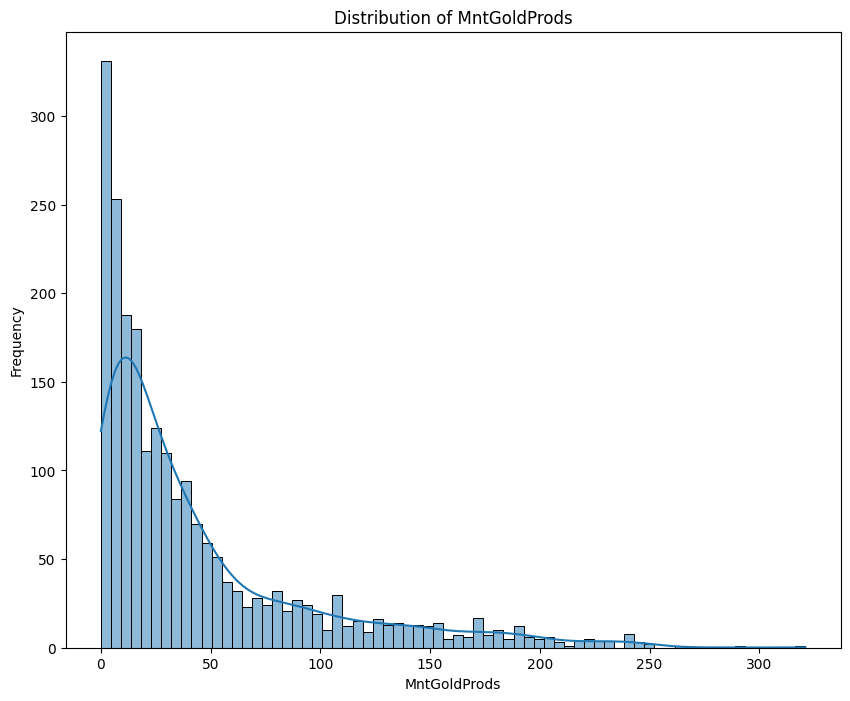

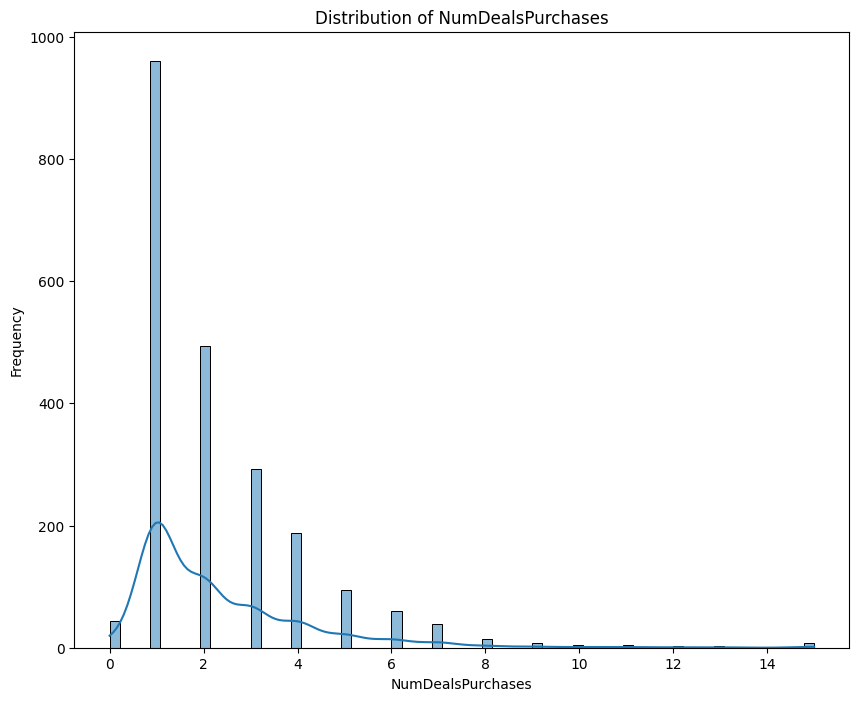

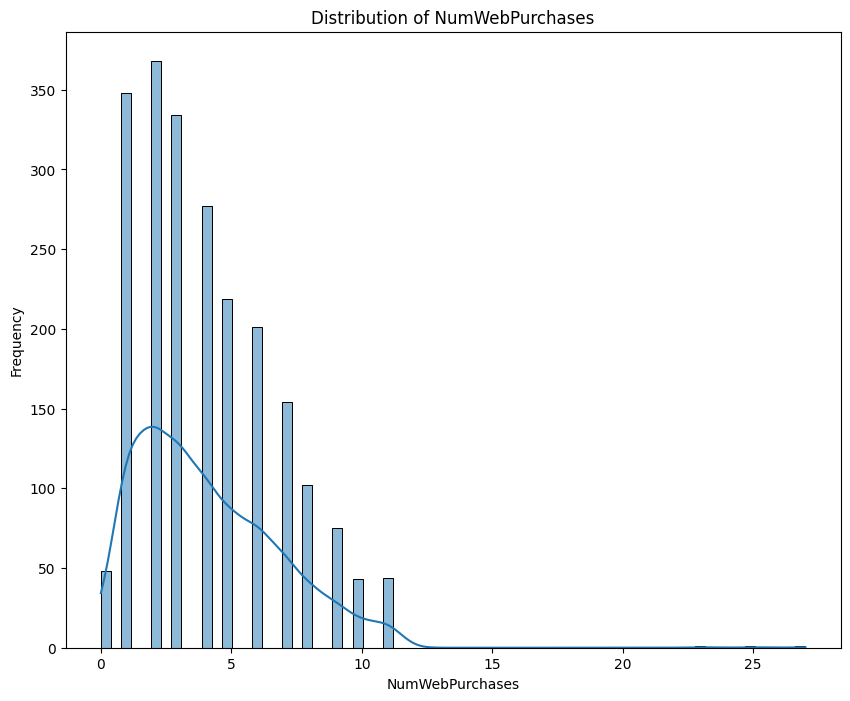

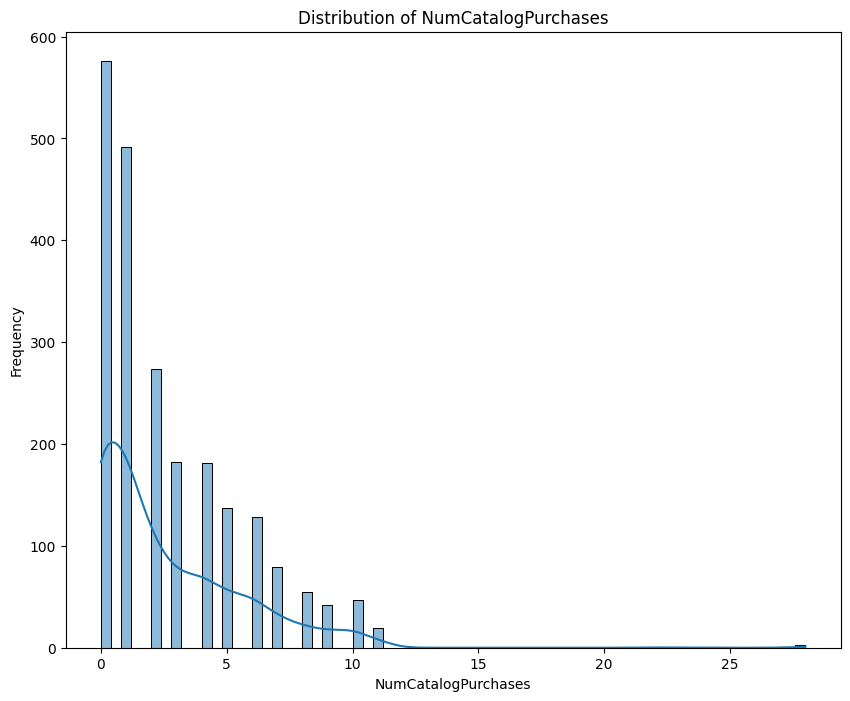

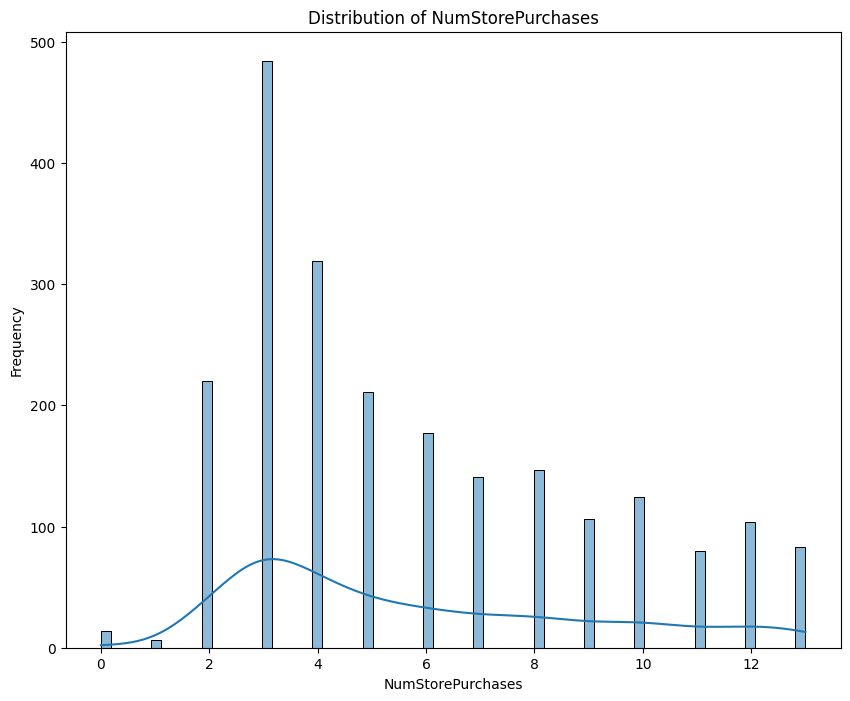

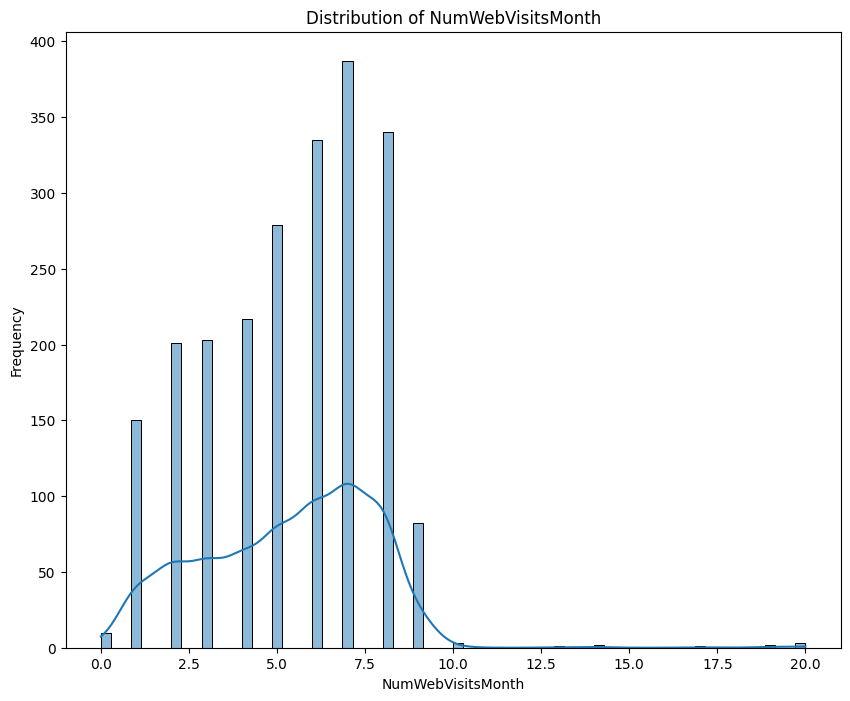

In [20]:
col_num = df.select_dtypes(include='number').columns
col_num = col_num.drop('ID')
col_num = col_num.drop('Year_Birth')
col_num = [col for col in col_num if df[col].nunique() > 3]
for col in col_num:
  plt.figure(figsize=(10, 8))
  sns.histplot(df[col], bins=70, kde=True,)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()


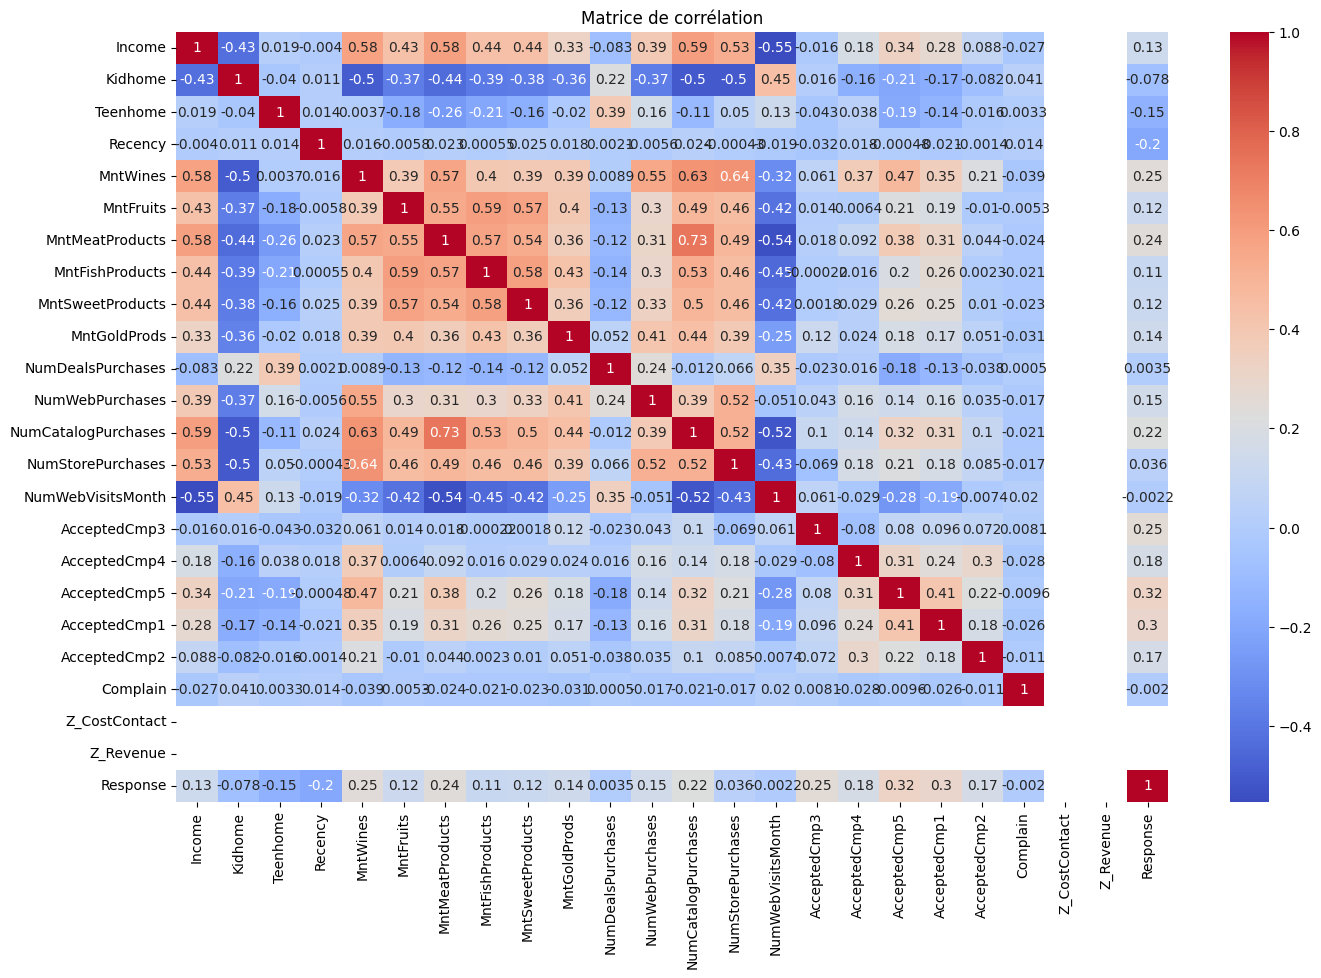

In [21]:
num_coll = df.select_dtypes(include='number').columns
num_coll = num_coll.drop('ID')
num_coll = num_coll.drop('Year_Birth')
corr = df[num_coll].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

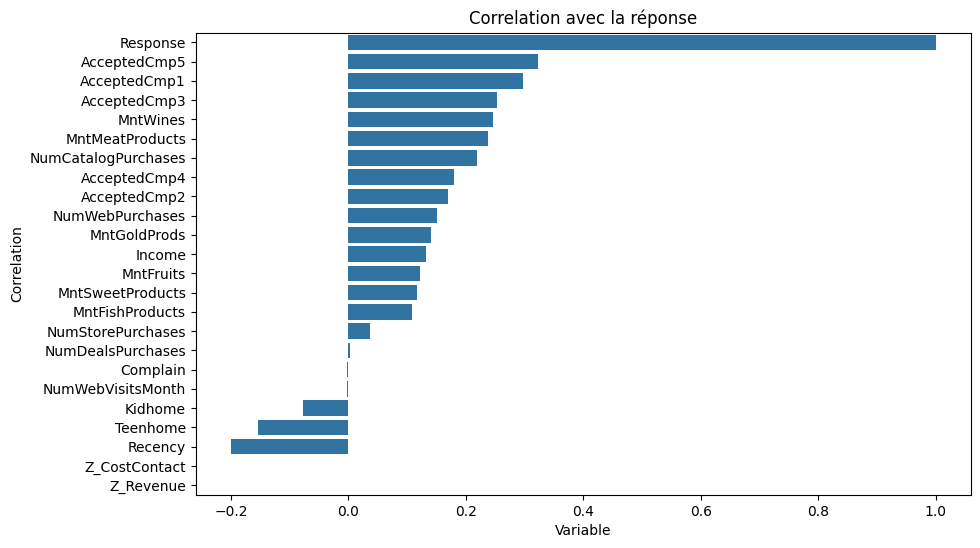

In [22]:
corr_avec_response = corr['Response'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_avec_response.values, y=corr_avec_response.index)
plt.title('Correlation avec la réponse')
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.show()

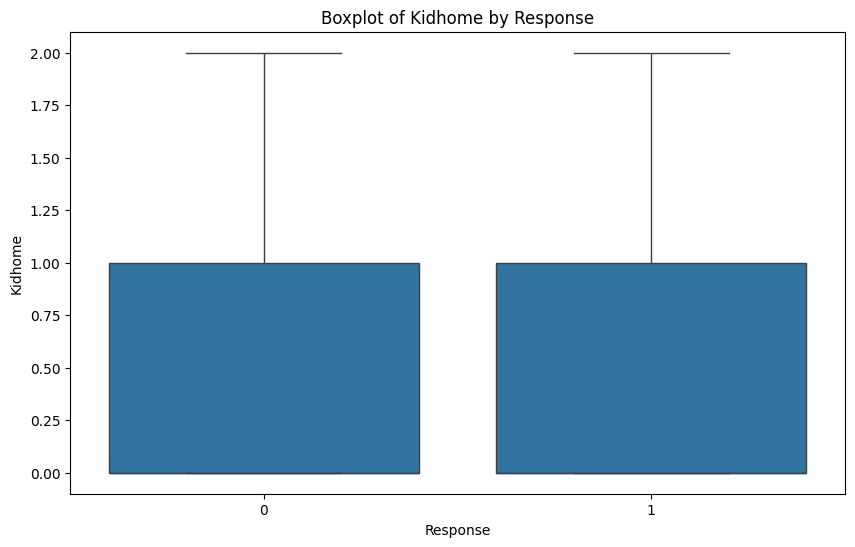

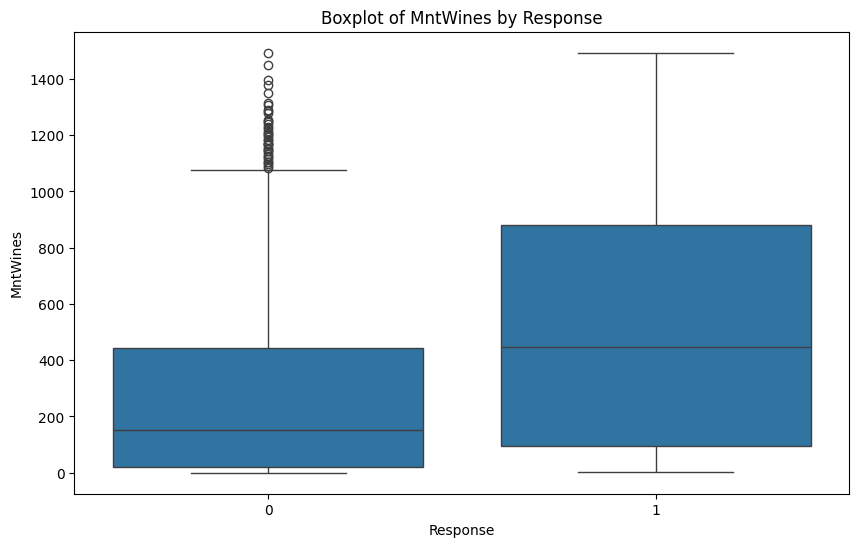

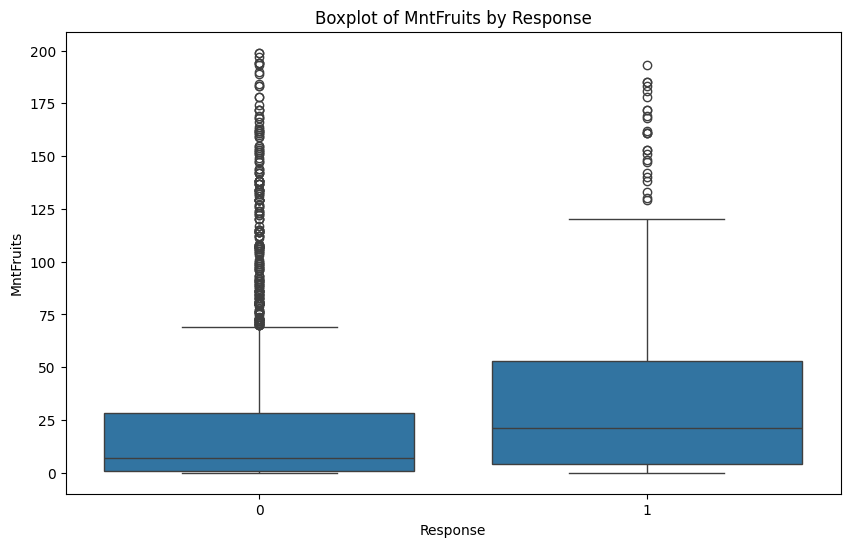

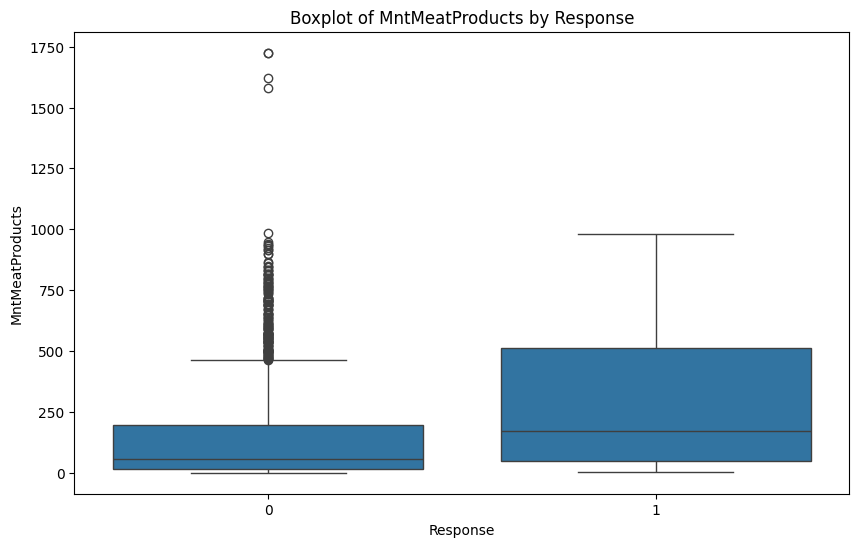

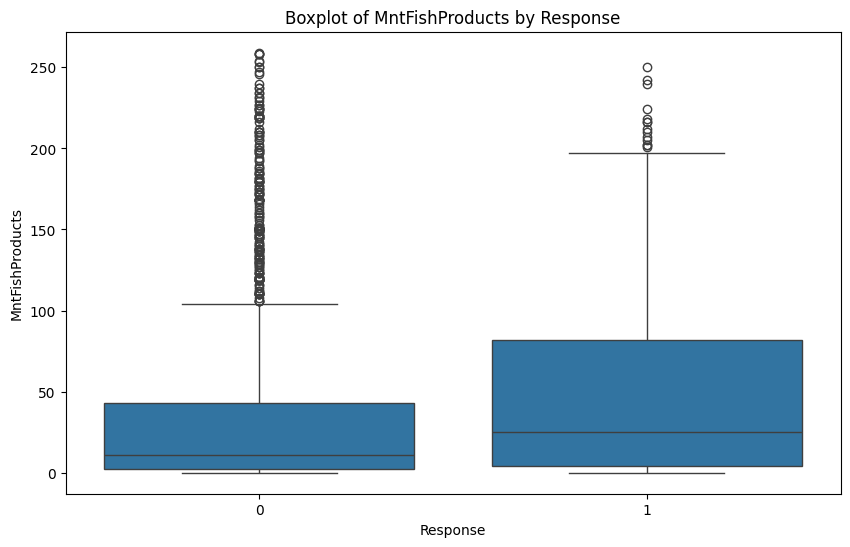

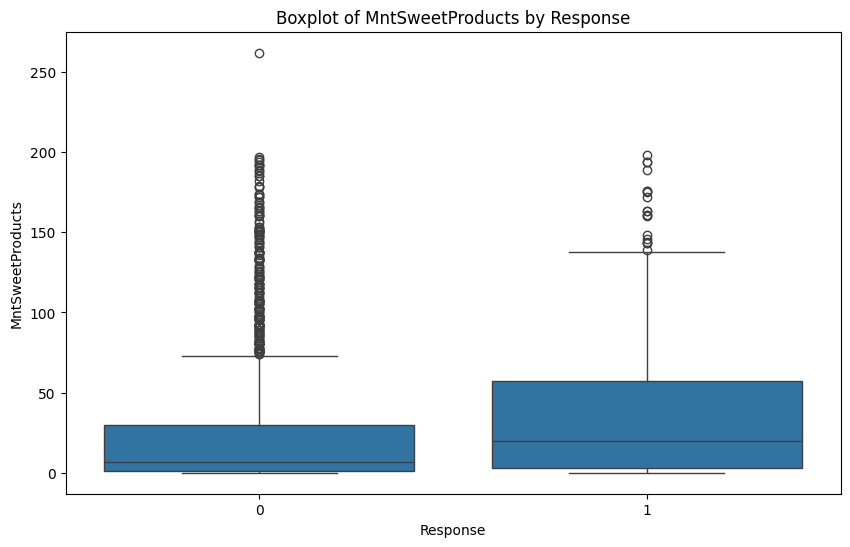

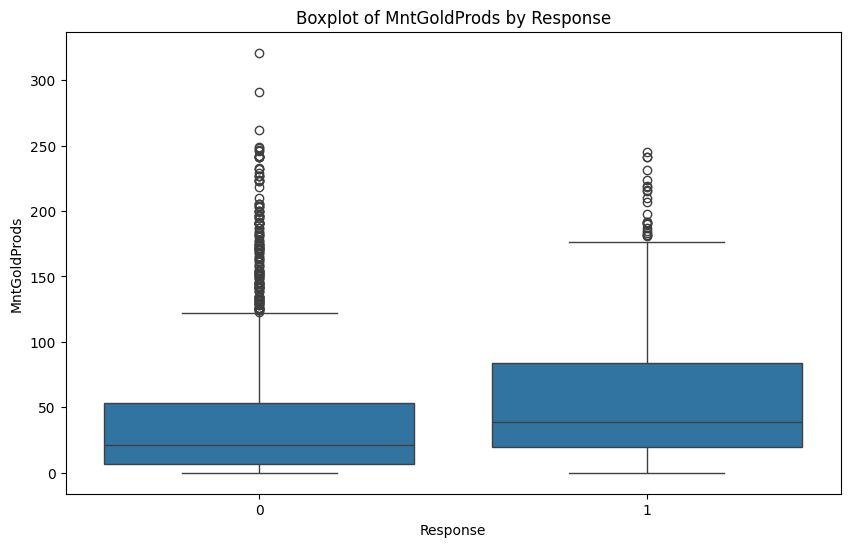

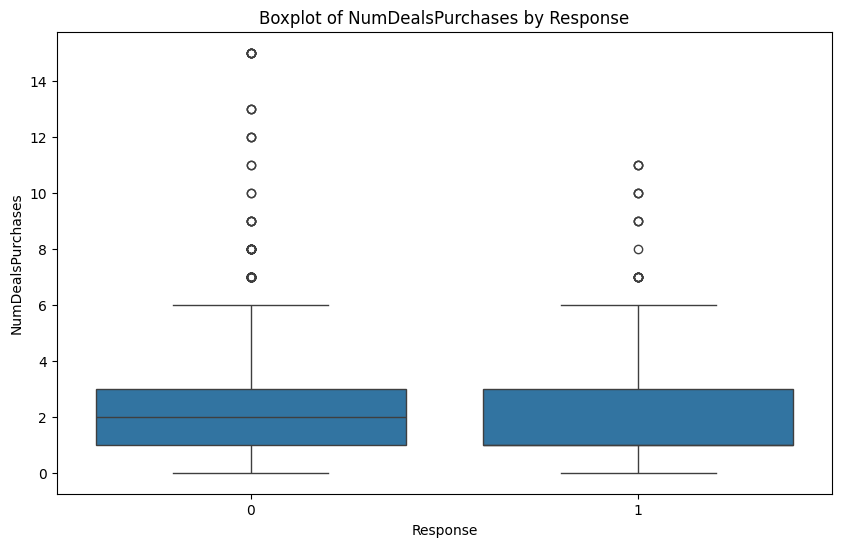

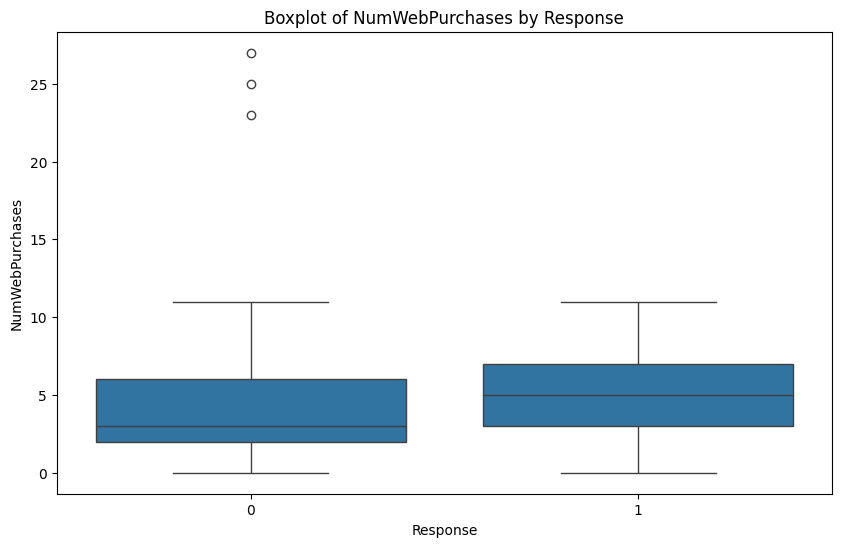

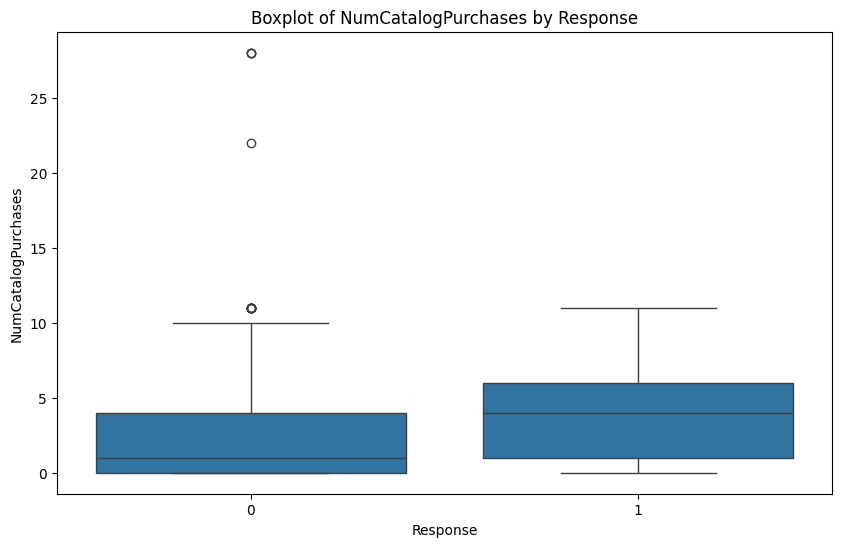

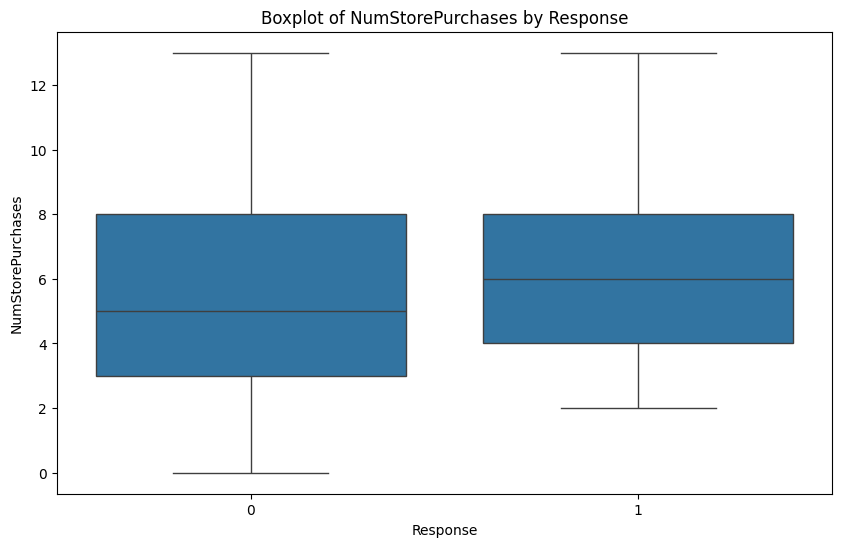

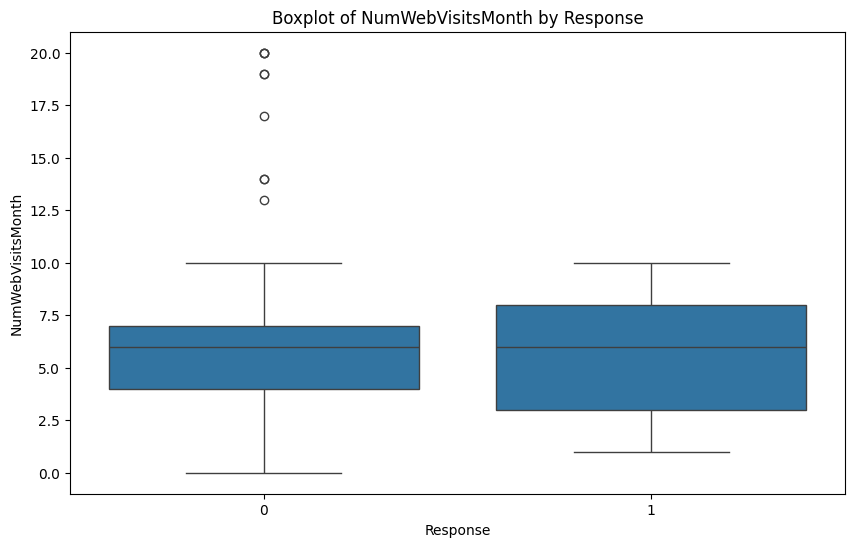

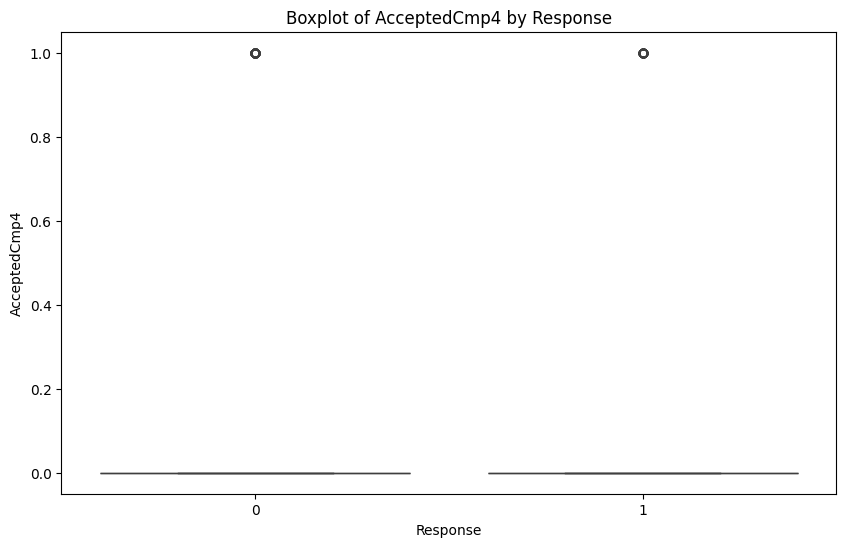

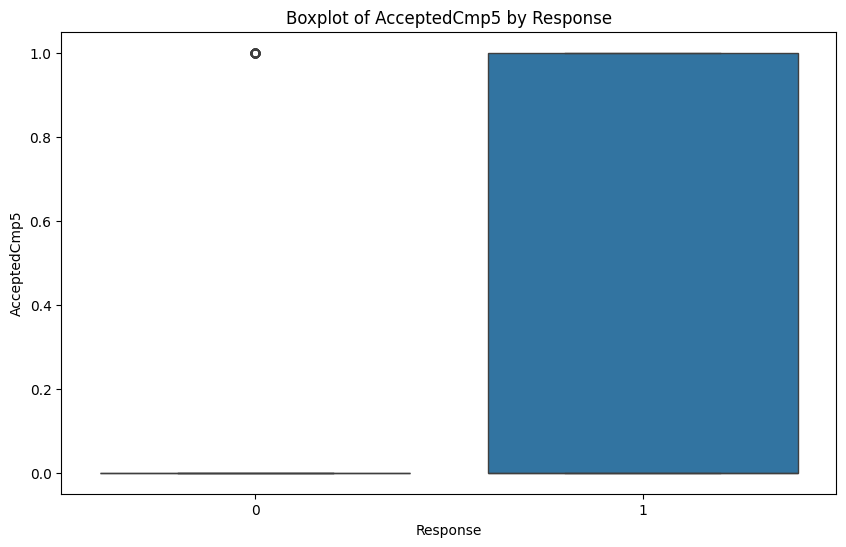

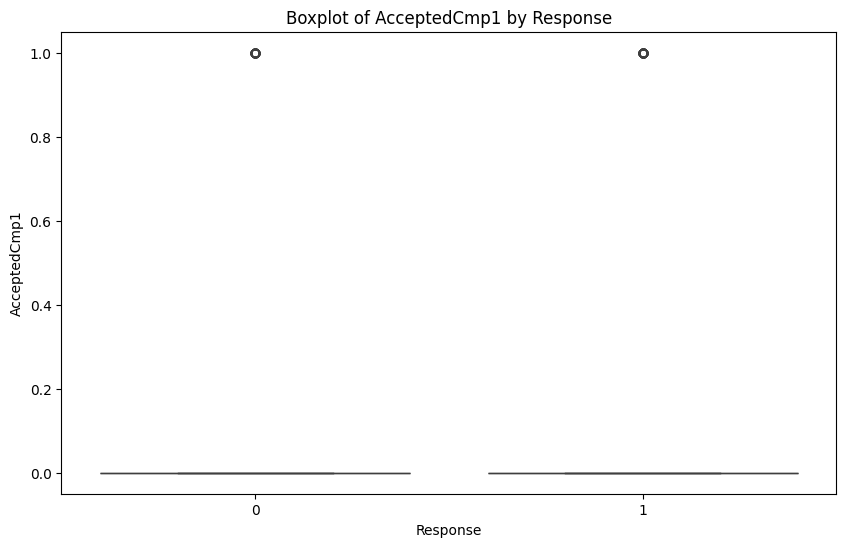

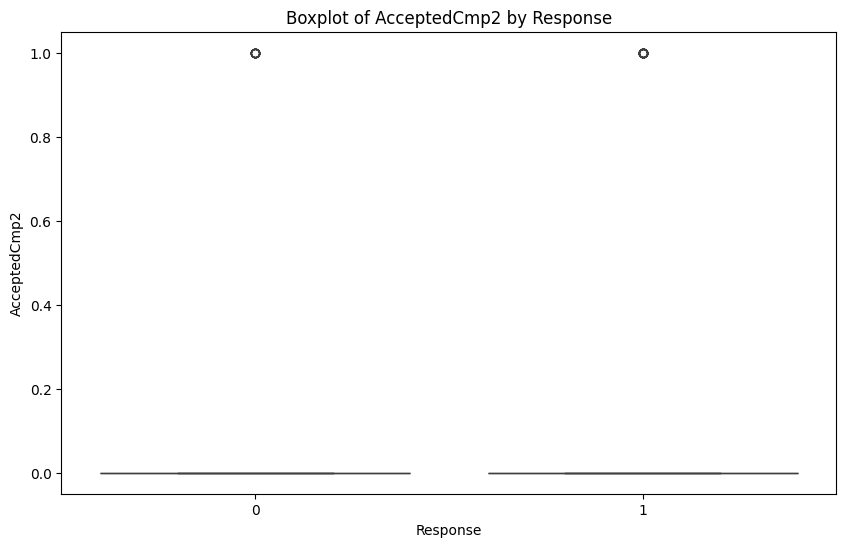

In [23]:
corr = corr.abs()
tri_corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
top_tri_corr = [col for col in tri_corr.columns if any(tri_corr[col] > 0.2)]
top_tri_corr = top_tri_corr[:-1]
for var in top_tri_corr:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='Response', y=var, data=df)
  plt.title(f'Boxplot of {var} by Response')
  plt.show()

In [24]:
# Initialiser l'application Dash
app = Dash(__name__)

# Mise en page de l'application
app.layout = html.Div([
    html.H1("Dashboard Marketing Campaigns", style={"textAlign": "center"}),

    # Filtres interactifs
    html.Div([
        html.Label("Filtrer par statut matrimonial :"),
        dcc.Dropdown(
            id="filter-marital",
            options=[{"label": i, "value": i} for i in df["Marital_Status"].unique()],
            value=None,
            placeholder="Choisissez un statut...",
        ),
        html.Label("Filtrer par niveau d'éducation :"),
        dcc.Dropdown(
            id="filter-education",
            options=[{"label": i, "value": i} for i in df["Education"].unique()],
            value=None,
            placeholder="Choisissez un niveau d'éducation...",
        ),
    ], style={"margin-bottom": "20px"}),

    # Graphiques
    html.Div([
        dcc.Graph(id="histogram-heatmap"),
        dcc.Graph(id="radar-chart"),
        dcc.Graph(id="stacked-bar-chart"),
        dcc.Graph(id="timeline-chart"),
    ])
])

# Callbacks pour mettre à jour les graphiques en fonction des filtres
@app.callback(
    [Output("histogram-heatmap", "figure"),
     Output("radar-chart", "figure"),
     Output("stacked-bar-chart", "figure"),
     Output("timeline-chart", "figure")],
    [Input("filter-marital", "value"),
     Input("filter-education", "value")]
)
def update_graphs(marital_status, education):
    # Filtrage des données
    filtered_df = df.copy()
    if marital_status:
        filtered_df = filtered_df[filtered_df["Marital_Status"] == marital_status]
    if education:
        filtered_df = filtered_df[filtered_df["Education"] == education]

    # 1. Histogramme empilé ou carte thermique
    heatmap_fig = px.histogram(
        filtered_df,
        x=["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"],
        color="Marital_Status",
        barmode="stack",
        title="Histogramme empilé des campagnes acceptées"
    )

    # 2. Diagramme en radar (toile d'araignée)
    radar_data = filtered_df.groupby("Marital_Status")[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts"]].mean().reset_index()
    radar_fig = go.Figure()
    for status in radar_data["Marital_Status"].unique():
        radar_fig.add_trace(go.Scatterpolar(
            r=radar_data[radar_data["Marital_Status"] == status].iloc[0, 1:].values,
            theta=["Wines", "Fruits", "Meat", "Fish", "Sweet"],
            fill='toself',
            name=status
        ))
    radar_fig.update_layout(title="Dépenses moyennes par segment")

    # 3. Graphique en barres empilées : Recency vs Montants dépensés
    stacked_bar_fig = px.bar(
        filtered_df,
        x="Recency",
        y=["MntWines", "MntFruits", "MntMeatProducts"],
        title="Recency vs Montants dépensés",
        barmode="stack"
    )

    # 4. Ligne chronologique (Timeline)
    timeline_fig = px.line(
        filtered_df,
        x="Year_Birth",  # Vous pouvez remplacer cela par une autre variable temporelle
        y="Income",
        color="Marital_Status",
        title="Ligne chronologique : Evolution des revenus"
    )

    return heatmap_fig, radar_fig, stacked_bar_fig, timeline_fig

# Lancer l'application
if __name__ == "__main__":
    app.run_server(debug=True)


<IPython.core.display.Javascript object>